# Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library untuk modelling/analysis
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil dilakukan ^_^')

Import Library Berhasil dilakukan ^_^


# Data Pre-processing

## Menampilkan dataset

In [2]:
data = pd.read_csv('Harga_Rumah_Smg.csv')
data.head()

,Judul,Title_URL,Update,Agen,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga,Harga_New,Juta
0,Rumah murah CLUSTER GRIYA KHARISMA,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 3 bulan yang lalu oleh,Saidun,Rumah,"Tembalang, Semarang",2,1,NaN,60,30.0,1,300.0,0.3,0.001
1,RUMAH MURAH CLUSTER GRIYA KHARISMA,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 3 bulan yang lalu oleh,Saidun,Rumah,"Tembalang, Semarang",2,1,NaN,60,30.0,1,300.0,0.3,NaN
2,"Rumah Semarang Timur, Ramai",https://www.rumah123.com/properti/semarang/hos...,Diperbarui 2 minggu yang lalu oleh,Kris,Rumah,"Semarang Timur, Semarang",2,1,NaN,65,30.0,1,300.0,0.3,NaN
3,Rumah Cluster Unnes Bisa Dp Mulai 10 Kpr Dibantu,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 2 hari yang lalu oleh,Atika,Rumah,"Gunung Pati, Semarang",2,1,1.0,120,32.0,1,300.0,0.3,NaN
4,Perumahan kudu nanggeng Genuk semarang timur,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 4 bulan yang lalu oleh,Suwarno,Rumah,"Genuk, Semarang",2,1,1.0,60,36.0,1,300.0,0.3,NaN


## Menghapus kolom/variabel yang tidak diperlukan

In [3]:
df = data.drop(["Judul","Title_URL","Update","Agen",'Harga','Juta'], axis=1)

## Menampilkan informasi data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12691 entries, 0 to 12690
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jenis_Rumah  12691 non-null  object 
 1   Lokasi       12691 non-null  object 
 2   KT           12691 non-null  int64  
 3   KM           12691 non-null  int64  
 4   Garasi       8271 non-null   float64
 5   LT           12691 non-null  int64  
 6   LB           12691 non-null  float64
 7   KPR_bulanan  12691 non-null  int64  
 8   Harga_New    12691 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 892.5+ KB


## Menampilkan nilai null pada data

In [5]:
df.isna().sum()

Jenis_Rumah       0
Lokasi            0
KT                0
KM                0
Garasi         4420
LT                0
LB                0
KPR_bulanan       0
Harga_New         0
dtype: int64

## Menampilkan dan menghapus data duplikat

In [6]:
df.duplicated().sum()

2656

In [7]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Mengecek kembali data duplikat
print("\nJumlah data duplikat setelah dihapus:")
df.duplicated().sum()


Jumlah data duplikat setelah dihapus:


0

# Data Cleaning



## Fill missing value 
Pada tahap akan dilakukan pengisian data pada missing value (fillna) menggunakan median.


In [8]:
#Membuat variabel baru dengan mengcopy dataframe df karena akan dibuat 2 jenis data cleaning
df_cleaning = df.copy()
df_cleaning.shape

(10035, 9)

In [9]:
df_cleaning.duplicated().sum()

0

In [10]:
#Mengecek missing value
df_cleaning.isna().sum()

Jenis_Rumah       0
Lokasi            0
KT                0
KM                0
Garasi         3524
LT                0
LB                0
KPR_bulanan       0
Harga_New         0
dtype: int64

In [11]:
df_cleaning.duplicated().sum()

0

In [12]:
#Mengisi data menggunakan median
df_cleaning['Garasi'].fillna(df['Garasi'].median(), inplace=True)

In [13]:
df_cleaning.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,Rumah,"Tembalang, Semarang",2,1,1.0,60,30.0,1,0.3
2,Rumah,"Semarang Timur, Semarang",2,1,1.0,65,30.0,1,0.3
3,Rumah,"Gunung Pati, Semarang",2,1,1.0,120,32.0,1,0.3
4,Rumah,"Genuk, Semarang",2,1,1.0,60,36.0,1,0.3
5,Rumah,"Tembalang, Semarang",2,1,1.0,72,36.0,1,0.3


In [14]:
# Menampilkan miss value setelah di fill median
df_cleaning.isna().sum()

Jenis_Rumah    0
Lokasi         0
KT             0
KM             0
Garasi         0
LT             0
LB             0
KPR_bulanan    0
Harga_New      0
dtype: int64

### Mengubah tipe data df_cleaning1

In [15]:
df_cleaning= df_cleaning.astype({'Garasi': 'int64','LB': 'int64', 'KPR_bulanan' : 'float64'})
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10035 entries, 0 to 12690
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jenis_Rumah  10035 non-null  object 
 1   Lokasi       10035 non-null  object 
 2   KT           10035 non-null  int64  
 3   KM           10035 non-null  int64  
 4   Garasi       10035 non-null  int64  
 5   LT           10035 non-null  int64  
 6   LB           10035 non-null  int64  
 7   KPR_bulanan  10035 non-null  float64
 8   Harga_New    10035 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 784.0+ KB


In [16]:
# Melihat nilai df_cleaning1
df_cleaning.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,Rumah,"Tembalang, Semarang",2,1,1,60,30,1.0,0.3
2,Rumah,"Semarang Timur, Semarang",2,1,1,65,30,1.0,0.3
3,Rumah,"Gunung Pati, Semarang",2,1,1,120,32,1.0,0.3
4,Rumah,"Genuk, Semarang",2,1,1,60,36,1.0,0.3
5,Rumah,"Tembalang, Semarang",2,1,1,72,36,1.0,0.3


In [17]:
df_cleaning.duplicated().sum()

500

In [18]:
# Menghapus data duplikat
df_cleaning = df_cleaning.drop_duplicates()

# Mengecek kembali data duplikat
print("\nJumlah data duplikat setelah dihapus:")
df_cleaning.duplicated().sum()


Jumlah data duplikat setelah dihapus:


0

In [19]:
df_cleaning.shape

(9535, 9)

In [20]:
df_cleaning.describe()

,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
count,9535.000000,9535.000000,9535.000000,9535.000000,9535.000000,9535.000000,9535.000000
mean,3.326062,2.141898,1.303094,175.151757,155.902150,5.666177,1.653104
std,1.350837,1.159370,0.706295,109.262627,107.196261,4.402219,1.181247
min,2.000000,1.000000,1.000000,28.000000,29.000000,1.000000,0.300000
25%,2.000000,1.000000,1.000000,104.000000,77.000000,2.000000,0.700000
50%,3.000000,2.000000,1.000000,142.000000,124.000000,4.000000,1.300000
75%,4.000000,3.000000,1.000000,210.000000,200.000000,8.000000,2.300000
max,9.000000,10.000000,10.000000,912.000000,900.000000,18.000000,5.000000


## Cardinality 
Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [21]:
# Menggunakan df_cleaning
df_card = df_cleaning.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]

print('Jumlah kategori dalam variabel "Jenis Rumah"             : {}'.format(len(df_card.Jenis_Rumah.unique())))
print('Jumlah kategori dalam variabel "Lokasi"                  : {}'.format(len(df_card.Lokasi.unique())))
print('Jumlah kategori dalam variabel "Kamar Tidur"             : {}'.format(len(df_card.KT.unique())))
print('Jumlah kategori dalam variabel "Kamar Mandi"             : {}'.format(len(df_card.KM.unique())))
print('Jumlah kategori dalam variabel "Garasi"                  : {}'.format(len(df_card.Garasi.unique())))
print('Jumlah kategori dalam variabel "Luas Tanah"              : {}'.format(len(df_card.LT.unique())))
print('Jumlah kategori dalam variabel "Luas Bangunan"           : {}'.format(len(df_card.LB.unique())))
print('Jumlah kategori dalam variabel "KPR Bulanan"             : {}'.format(len(df_card.KPR_bulanan.unique())))
print('Jumlah kategori dalam variabel "Harga"                   : {}'.format(len(df_card.Harga_New.unique())))

Jumlah kategori dalam variabel "Jenis Rumah"             : 3
Jumlah kategori dalam variabel "Lokasi"                  : 16
Jumlah kategori dalam variabel "Kamar Tidur"             : 8
Jumlah kategori dalam variabel "Kamar Mandi"             : 10
Jumlah kategori dalam variabel "Garasi"                  : 10
Jumlah kategori dalam variabel "Luas Tanah"              : 500
Jumlah kategori dalam variabel "Luas Bangunan"           : 363
Jumlah kategori dalam variabel "KPR Bulanan"             : 18
Jumlah kategori dalam variabel "Harga"                   : 487


## Encoding
### Label encode

In [22]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

In [23]:
# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df_cleaning.select_dtypes(include='object')
df_Lencode = df_cleaning.copy()

for column in df_category.columns:
    df_Lencode[column] = label_encoder.fit_transform(df_cleaning[column])

In [24]:
df_Lencode.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,0,14,2,1,1,60,30,1.0,0.3
2,0,12,2,1,1,65,30,1.0,0.3
3,0,5,2,1,1,120,32,1.0,0.3
4,0,4,2,1,1,60,36,1.0,0.3
5,0,14,2,1,1,72,36,1.0,0.3


### One Hot Encode

In [25]:
def one_hot_encoder(data, feature, keep_first=True):
    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)
    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [26]:
# Melakukan copy dataframe df_cleaning1 menjadi df_onehot_cleaning1
df_onehot = df_cleaning.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_onehot.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_onehot = one_hot_encoder(df_onehot, col)

# Menampilkan 5 baris pertama dari dataframe df_onehot_cleaning1
df_onehot.head()

,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New,Jenis_Rumah_Rumah,Jenis_Rumah_Rumah\nFeatured,Jenis_Rumah_Rumah\nPremier,...,"Lokasi_Mijen, Semarang","Lokasi_Ngaliyan, Semarang","Lokasi_Pedurungan, Semarang","Lokasi_Semarang Barat, Semarang","Lokasi_Semarang Selatan, Semarang","Lokasi_Semarang Tengah, Semarang","Lokasi_Semarang Timur, Semarang","Lokasi_Semarang Utara, Semarang","Lokasi_Tembalang, Semarang","Lokasi_Tugu, Semarang"
0,2,1,1,60,30,1.0,0.3,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,1,65,30,1.0,0.3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,1,1,120,32,1.0,0.3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,60,36,1.0,0.3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1,1,72,36,1.0,0.3,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Skewness value
### Label Encode 

Jenis_Rumah
14.822286000174685


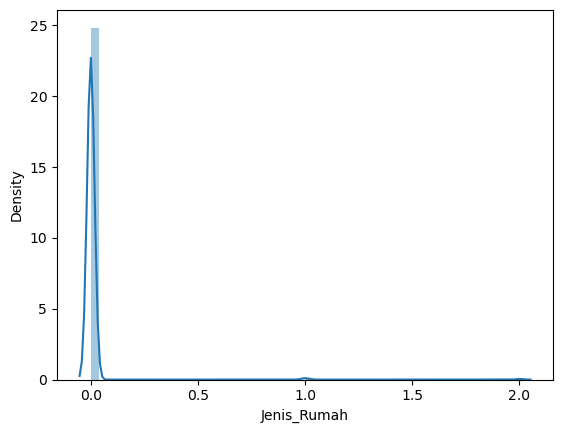

Lokasi
-0.4450722707962008


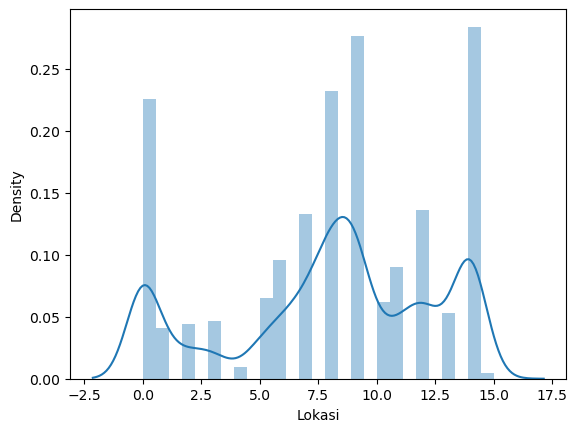

KT
1.5283076717038568


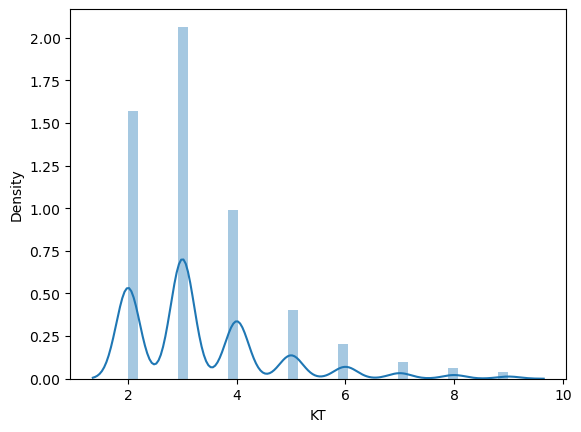

KM
1.8483740333912912


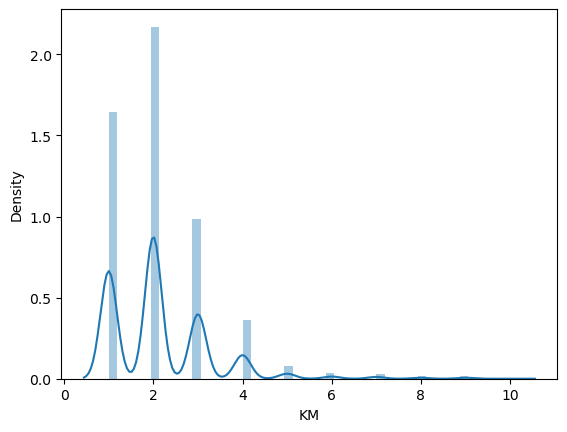

Garasi
4.161326608349793


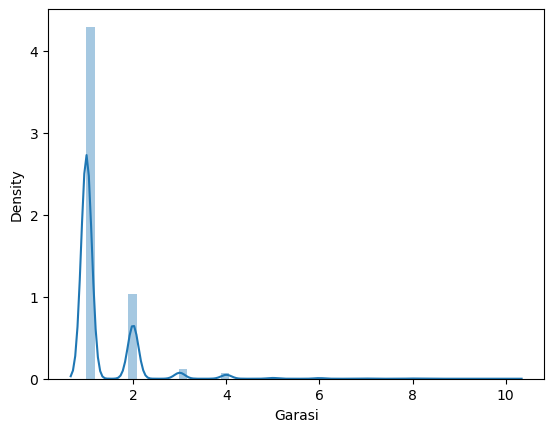

LT
2.1936560983642472


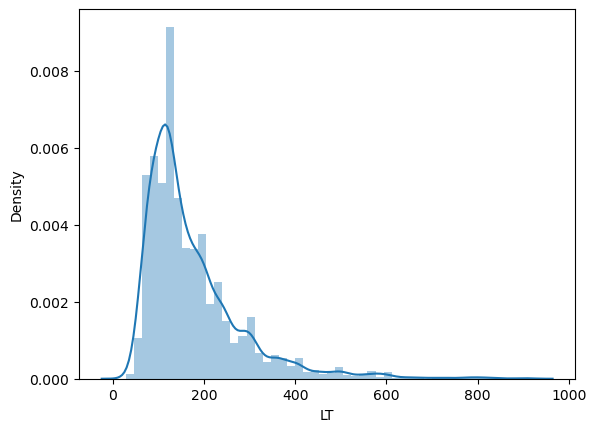

LB
1.6340069100721837


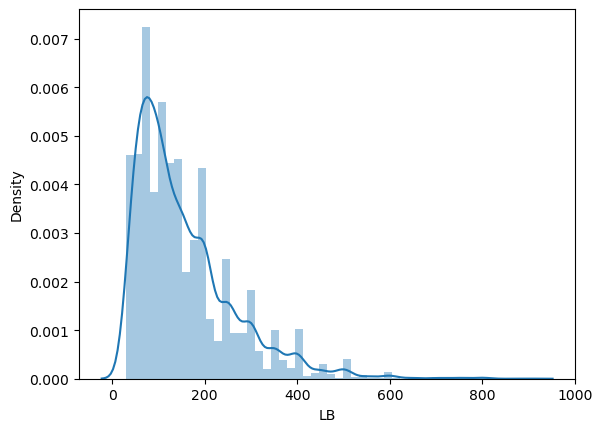

KPR_bulanan
1.0559754818755132


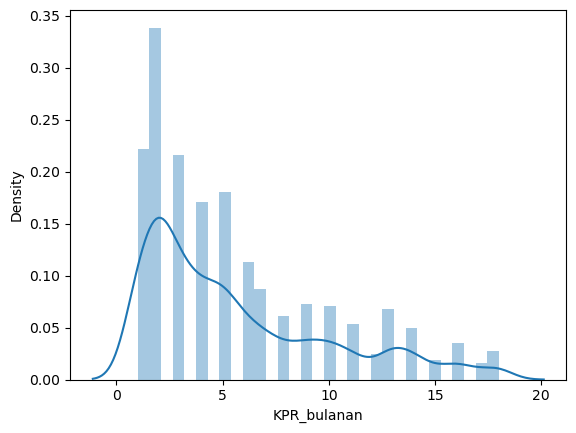

Harga_New
1.0873042980451206


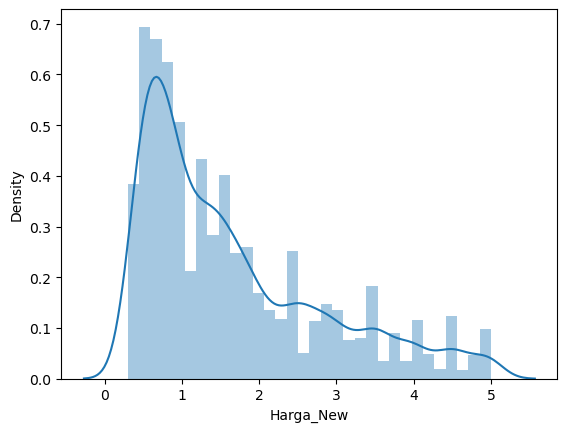

In [27]:
from scipy.stats import skew

for col in df_Lencode:
    print(col)
    print(skew(df_Lencode[col]))
    
    plt.figure()
    sns.distplot(df_Lencode[col])
    plt.show()

### One Hot Encode 

KT
1.5283076717038568


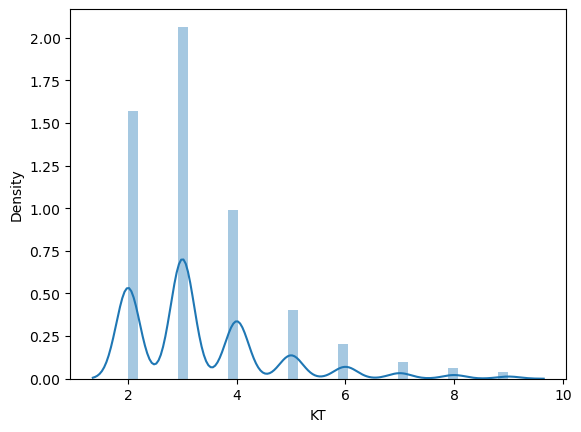

KM
1.8483740333912912


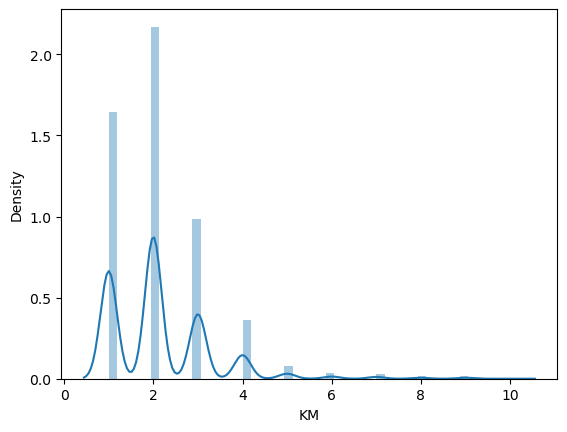

Garasi
4.161326608349793


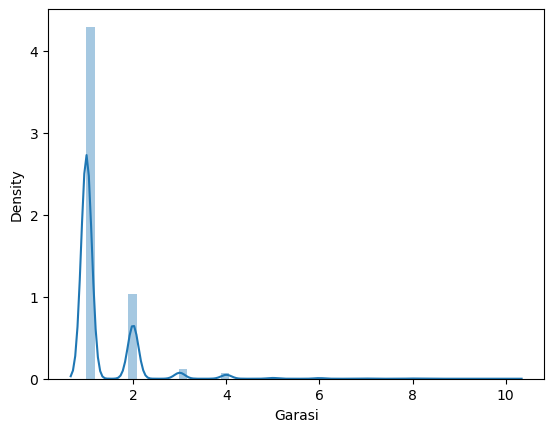

LT
2.1936560983642472


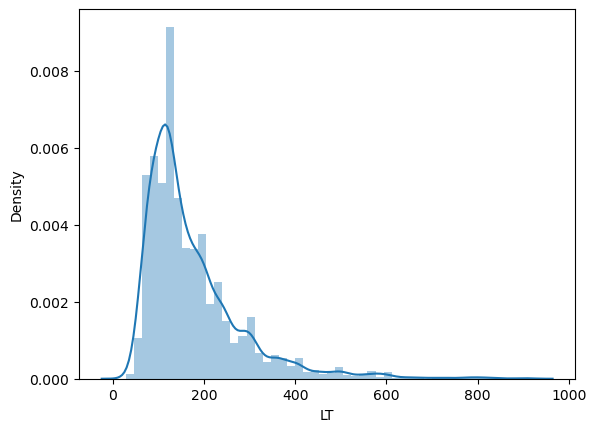

LB
1.6340069100721837


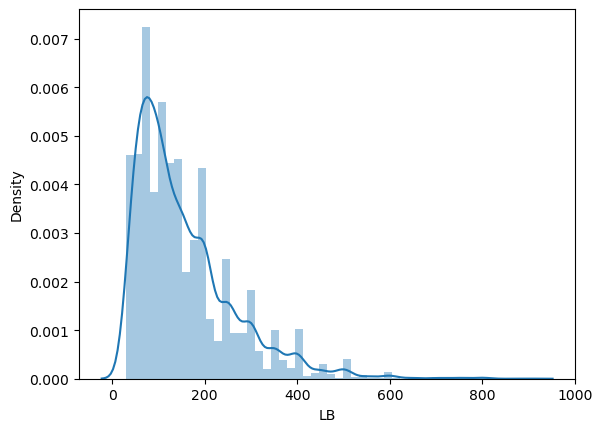

KPR_bulanan
1.0559754818755132


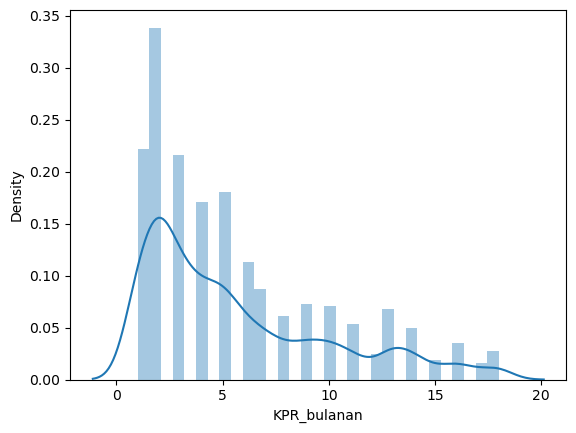

Harga_New
1.0873042980451206


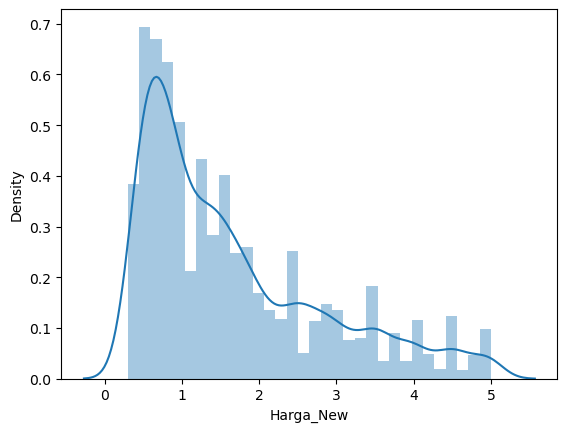

Jenis_Rumah_Rumah
-12.486913114156453


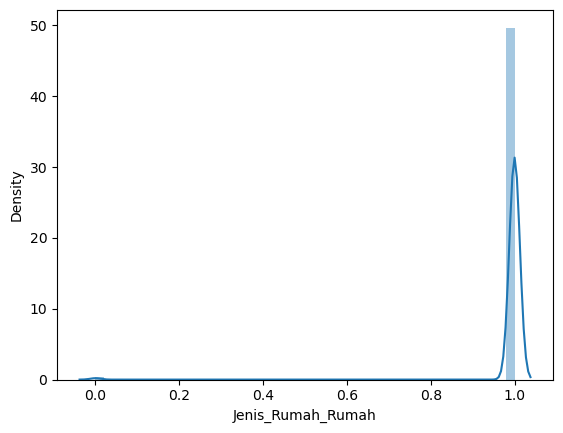

Jenis_Rumah_Rumah
Featured
14.96757274365021


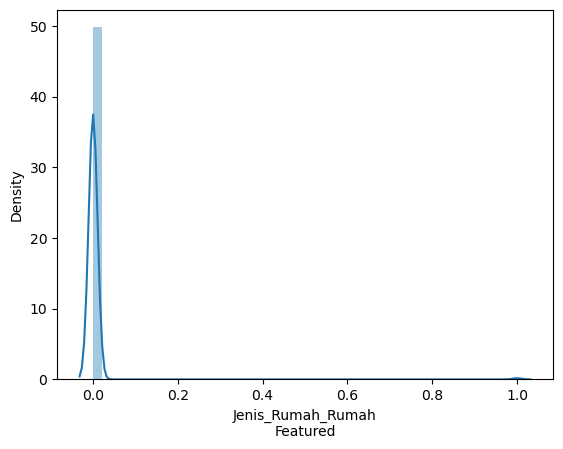

Jenis_Rumah_Rumah
Premier
22.950470879146227


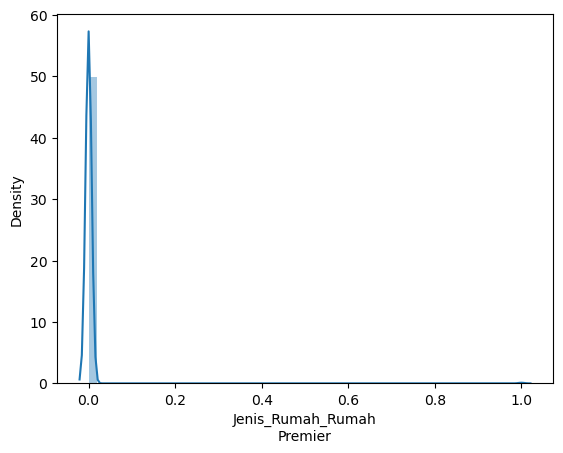

Lokasi_Banyumanik, Semarang
2.2632642067621247


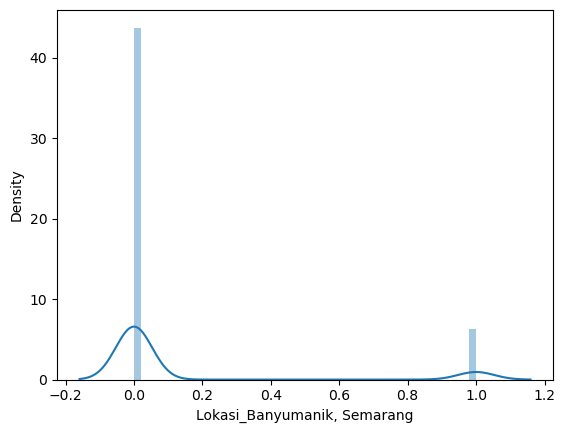

Lokasi_Candisari, Semarang
6.38450704436964


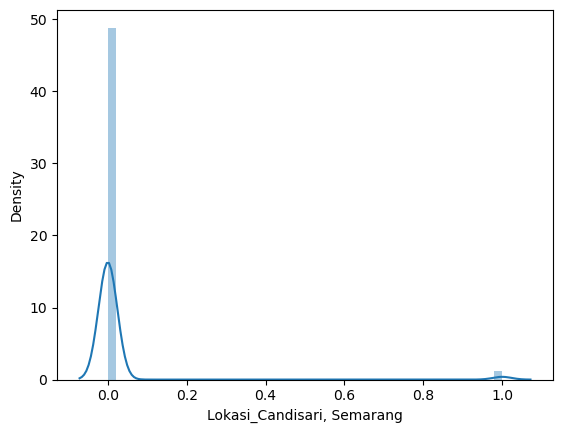

Lokasi_Gajah Mungkur, Semarang
6.1318624334137395


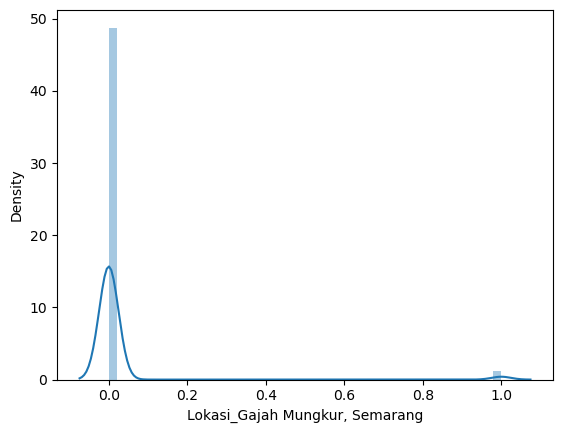

Lokasi_Gayamsari, Semarang
5.982194040520003


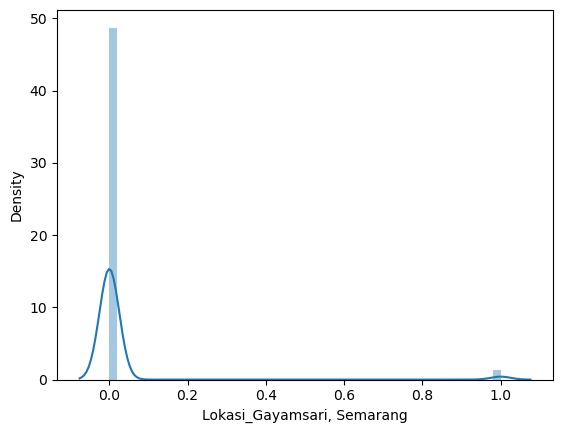

Lokasi_Genuk, Semarang
13.563412615989494


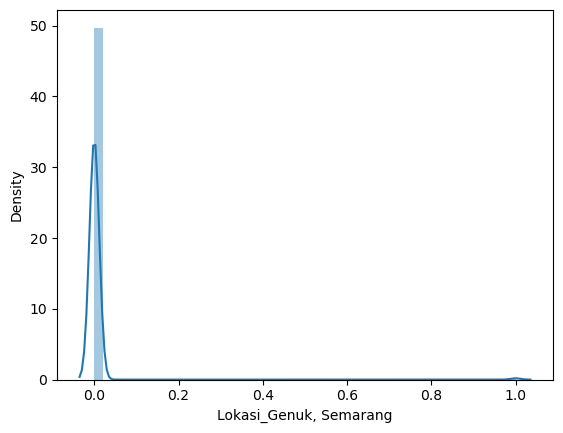

Lokasi_Gunung Pati, Semarang
4.975485019013723


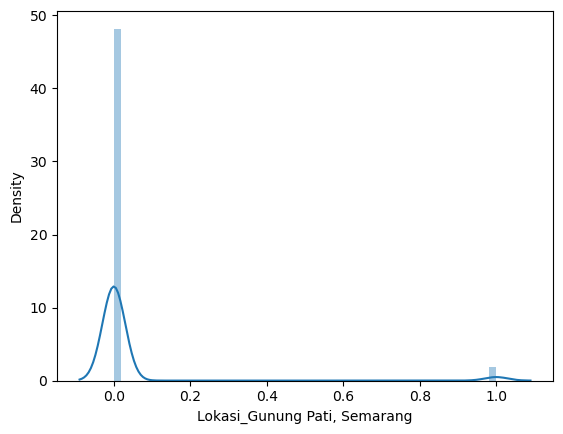

Lokasi_Mijen, Semarang
3.9828212026191268


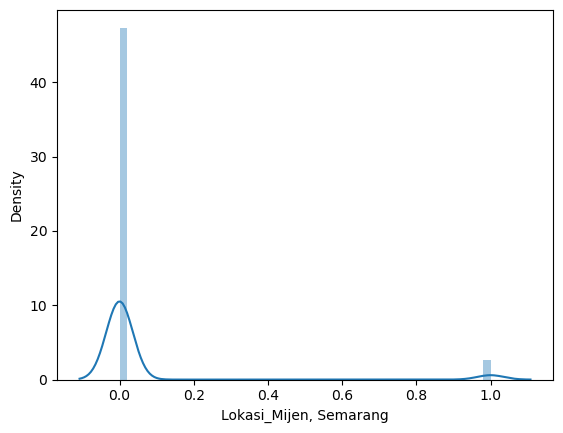

Lokasi_Ngaliyan, Semarang
3.2623453315885134


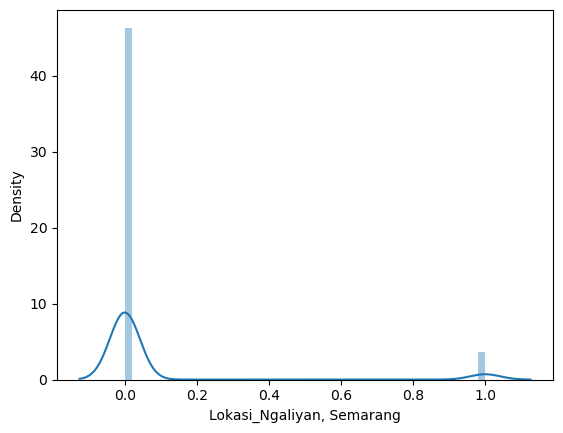

Lokasi_Pedurungan, Semarang
2.2108433132008862


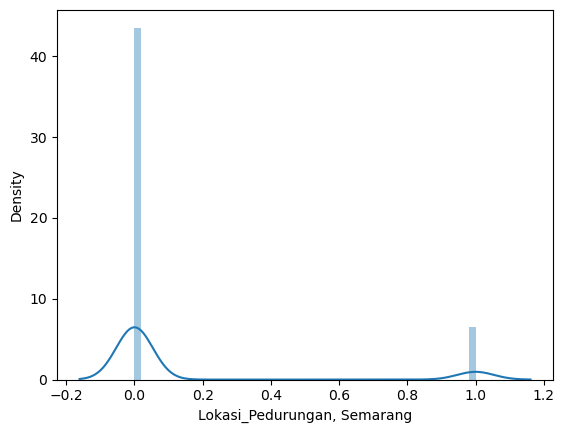

Lokasi_Semarang Barat, Semarang
1.9209552254934774


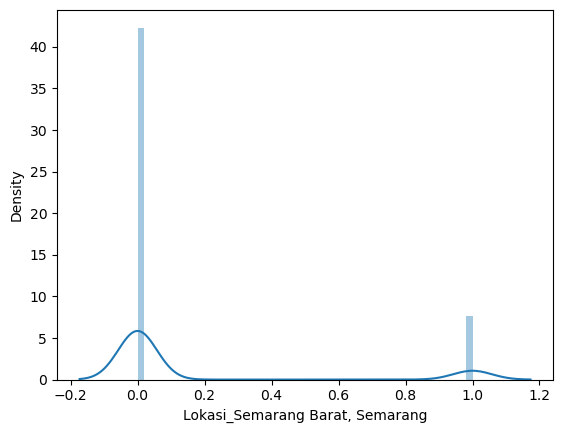

Lokasi_Semarang Selatan, Semarang
5.100735288210163


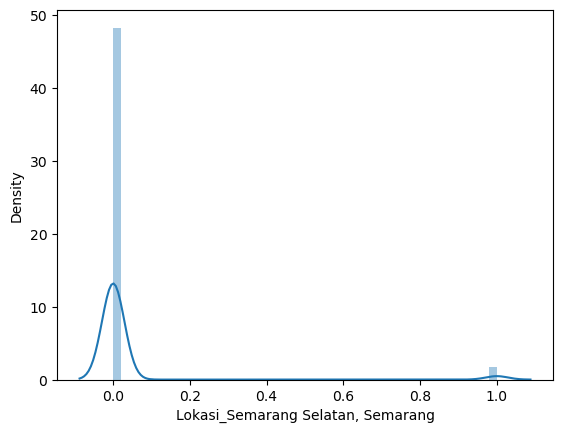

Lokasi_Semarang Tengah, Semarang
4.118124256174176


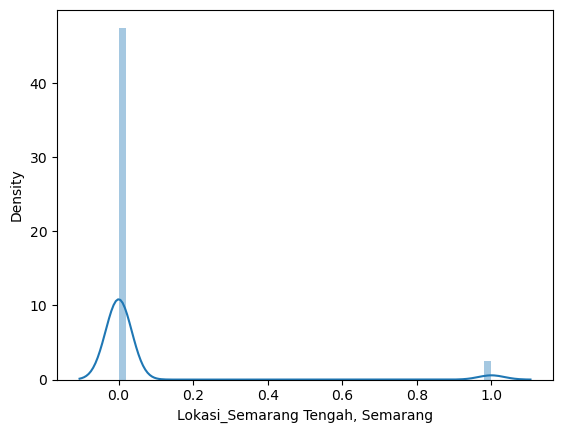

Lokasi_Semarang Timur, Semarang
3.2132124909317783


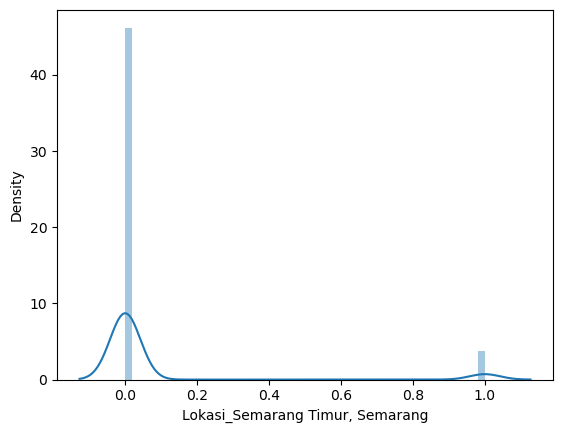

Lokasi_Semarang Utara, Semarang
5.5536054360903


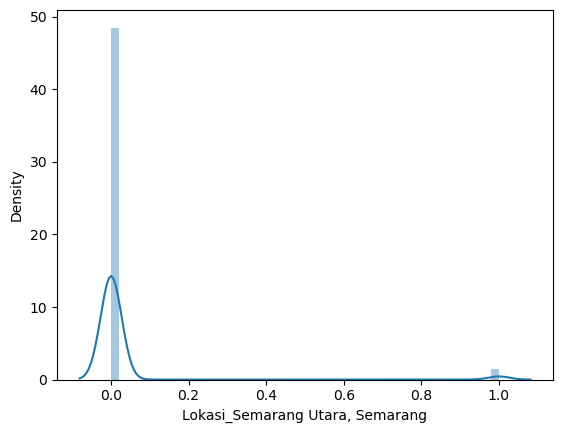

Lokasi_Tembalang, Semarang
1.8769577351745828


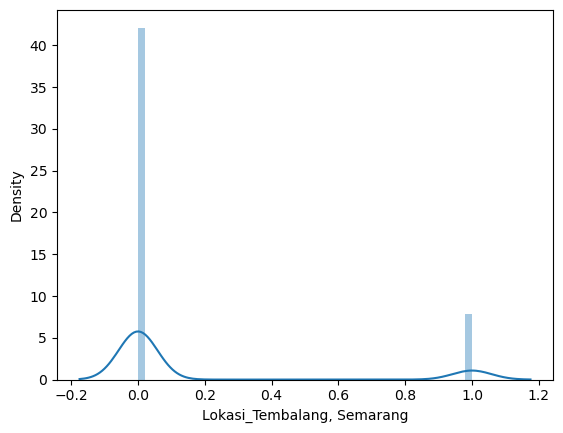

Lokasi_Tugu, Semarang
19.856842399048045


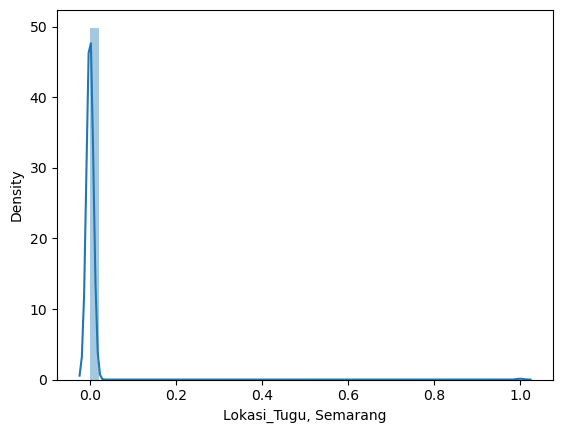

In [28]:
for col in df_onehot:
    print(col)
    print(skew(df_onehot[col]))
    
    plt.figure()
    sns.distplot(df_onehot[col])
    plt.show()

## Outlier Handling dengan IQR Method

In [29]:
df_cleaning.duplicated().sum()

0

In [30]:
# Mencari tahu data yang memiliki outliers dengan mendefinisikan fungsi
continous_features = ["KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"] 
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q_1 = np.percentile(feature_data, 25.)
        Q_3 = np.percentile(feature_data, 75.)
        IQR = Q_3-Q_1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q_1 - outlier_step) & (feature_data <= Q_3 + outlier_step))].index.tolist()  
        print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))

In [31]:
outliers(df_cleaning[continous_features])

Pada kolom KT, jumlah outliernya adalah 177
Pada kolom KM, jumlah outliernya adalah 103
Pada kolom Garasi, jumlah outliernya adalah 2162
Pada kolom LT, jumlah outliernya adalah 556
Pada kolom LB, jumlah outliernya adalah 421
Pada kolom KPR_bulanan, jumlah outliernya adalah 145
Pada kolom Harga_New, jumlah outliernya adalah 216


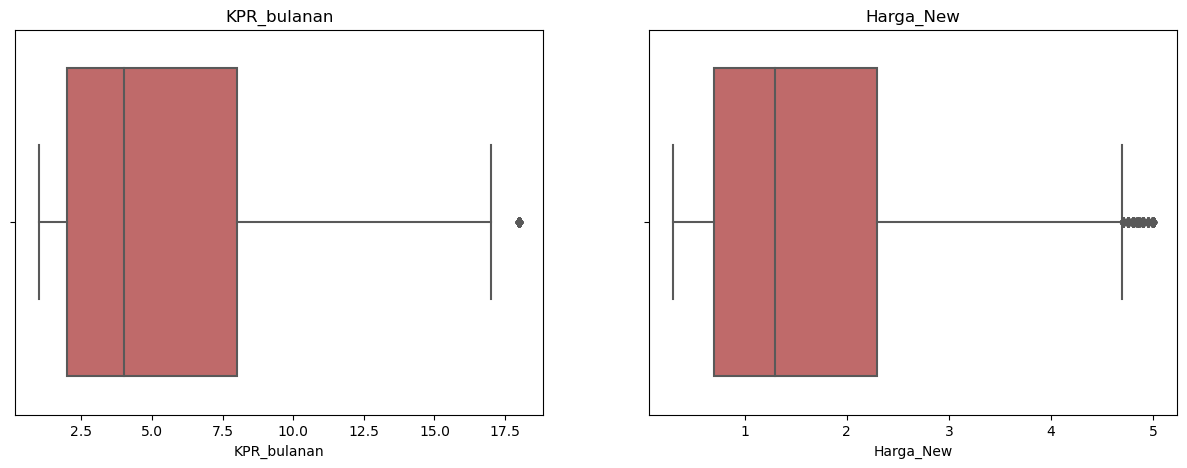

In [32]:
cols = df_cleaning.loc[:,["KPR_bulanan","Harga_New"]]
    
plt.figure(figsize=(15,5))

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(hspace =.3, wspace=.2)
    plt.title(col)
    sns.boxplot(x = df_cleaning[col], color = 'indianred')

In [33]:
# Menghitung kuartil 1 (Q1) 
Q1 = df_cleaning['KPR_bulanan'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) 
Q3 = df_cleaning['KPR_bulanan'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) 
IQR = Q3-Q1
print("Nilai Kuartil 1 :", Q1)
print("Nilai Kuartil 3 :", Q3)
print("Nilai Rentang :", IQR)

Nilai Kuartil 1 : 2.0
Nilai Kuartil 3 : 8.0
Nilai Rentang : 6.0


In [34]:
df_cleaning[df_cleaning['KPR_bulanan'] > (Q3 + (1.5 * IQR))].head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
12506,Rumah,"Semarang Barat, Semarang",4,4,2,287,300,18.0,4.85
12507,Rumah,"Semarang Tengah, Semarang",4,3,2,287,400,18.0,4.85
12508,Rumah,"Semarang Barat, Semarang",4,4,2,287,400,18.0,4.85
12509,Rumah,"Semarang Barat, Semarang",4,4,1,287,400,18.0,4.85
12511,Rumah\nFeatured,"Semarang Tengah, Semarang",4,4,2,287,400,18.0,4.85


In [35]:
df_cleaning[df_cleaning['KPR_bulanan'] < (Q1 - (1.5 * IQR))].head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [36]:
print('Data sebelum di hilangkan outliernya :', df_cleaning.shape)
df_cleaningA = df_cleaning[~((df_cleaning["KPR_bulanan"]>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_cleaningA.shape)

Data sebelum di hilangkan outliernya : (9535, 9)
Data sesudah dihilangkan outliernya : (9390, 9)


In [37]:
# Menghitung kuartil 1 (Q1) 
Q1 = df_cleaning['Harga_New'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) 
Q3 = df_cleaning['Harga_New'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) 
IQR = Q3-Q1
print("Nilai Kuartil 1 :", Q1)
print("Nilai Kuartil 3 :", Q3)
print("Nilai Rentang :", IQR)

Nilai Kuartil 1 : 0.7
Nilai Kuartil 3 : 2.3
Nilai Rentang : 1.5999999999999999


In [38]:
df_cleaning[df_cleaning['Harga_New'] > (Q3 + (1.5 * IQR))].head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
12406,Rumah,"Semarang Tengah, Semarang",4,3,1,218,200,17.0,4.7
12407,Rumah,"Semarang Tengah, Semarang",4,3,1,174,250,17.0,4.7
12408,Rumah,"Gajah Mungkur, Semarang",4,2,1,430,267,17.0,4.7
12409,Rumah,"Semarang Timur, Semarang",4,3,1,250,270,17.0,4.7
12410,Rumah,"Semarang Selatan, Semarang",5,4,1,260,290,17.0,4.7


In [39]:
df_cleaning[df_cleaning['Harga_New'] < (Q1 - (1.5 * IQR))]

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [40]:
print('Data sebelum di hilangkan outliernya :', df_cleaning.shape)
df_cleaningA = df_cleaning[~((df_cleaning["Harga_New"]>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_cleaningA.shape)

Data sebelum di hilangkan outliernya : (9535, 9)
Data sesudah dihilangkan outliernya : (9319, 9)


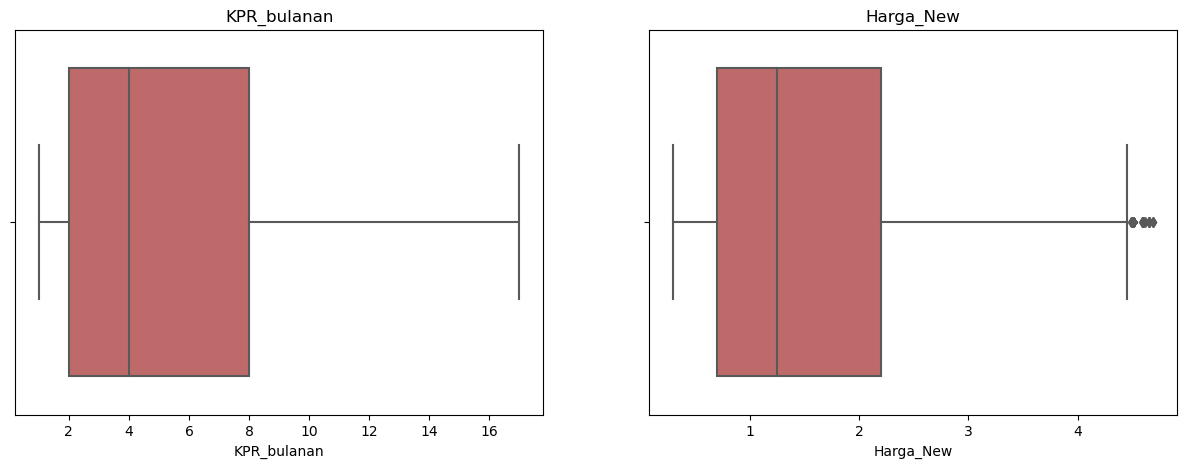

In [41]:
cols = df_cleaningA.loc[:,['KPR_bulanan', 'Harga_New']]
    
plt.figure(figsize=(15,5))

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(hspace =.3, wspace=.2)
    plt.title(col)
    sns.boxplot(x = df_cleaningA[col], color = 'indianred')

In [43]:
outliers(df_cleaningA[continous_features])

Pada kolom KT, jumlah outliernya adalah 174
Pada kolom KM, jumlah outliernya adalah 98
Pada kolom Garasi, jumlah outliernya adalah 2071
Pada kolom LT, jumlah outliernya adalah 549
Pada kolom LB, jumlah outliernya adalah 347
Pada kolom KPR_bulanan, jumlah outliernya adalah 0
Pada kolom Harga_New, jumlah outliernya adalah 183


# Exploratory Data Analysis (EDA)
## Deskripsi data statistik (numerik)

In [42]:
df_cleaning.describe()

,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
count,9535.000000,9535.000000,9535.000000,9535.000000,9535.000000,9535.000000,9535.000000
mean,3.326062,2.141898,1.303094,175.151757,155.902150,5.666177,1.653104
std,1.350837,1.159370,0.706295,109.262627,107.196261,4.402219,1.181247
min,2.000000,1.000000,1.000000,28.000000,29.000000,1.000000,0.300000
25%,2.000000,1.000000,1.000000,104.000000,77.000000,2.000000,0.700000
50%,3.000000,2.000000,1.000000,142.000000,124.000000,4.000000,1.300000
75%,4.000000,3.000000,1.000000,210.000000,200.000000,8.000000,2.300000
max,9.000000,10.000000,10.000000,912.000000,900.000000,18.000000,5.000000


## Visualisasi

### Visualisasi Pairplot

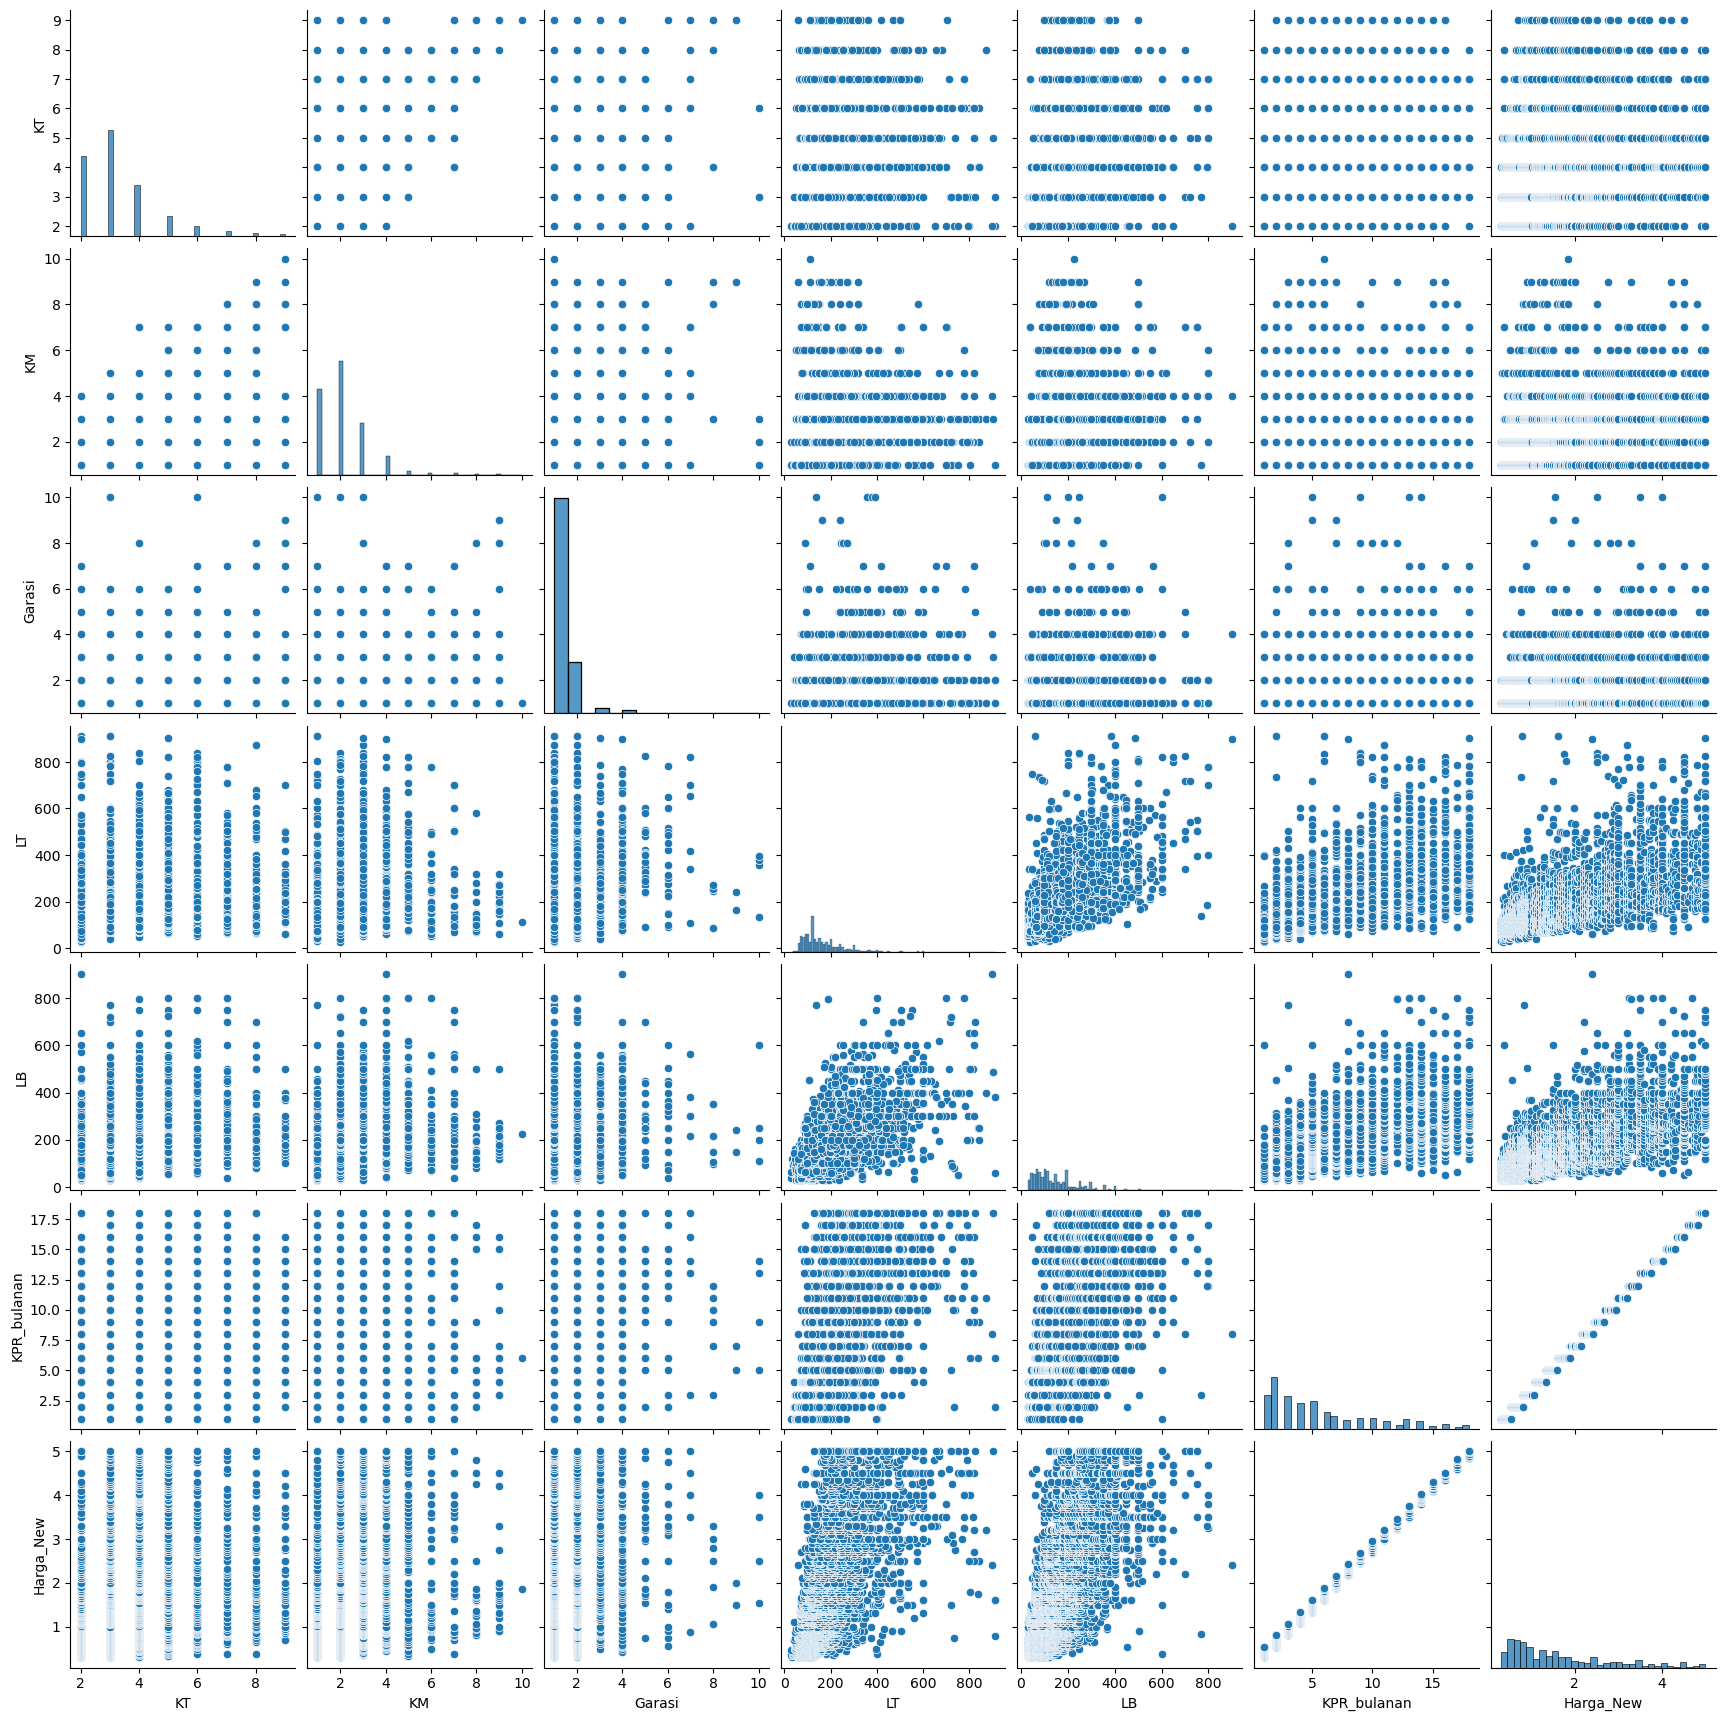

In [102]:
sns.pairplot(df_cleaning, palette='husl')
plt.show()

### Bagaimana persebaran penjualan rumah di Kota Semarang?

In [45]:
lok = df_cleaning['Lokasi'].value_counts()
lok

Tembalang, Semarang           1505
Semarang Barat, Semarang      1465
Pedurungan, Semarang          1232
Banyumanik, Semarang          1195
Semarang Timur, Semarang       720
Ngaliyan, Semarang             703
Mijen, Semarang                507
Semarang Tengah, Semarang      479
Gunung Pati, Semarang          344
Semarang Selatan, Semarang     329
Semarang Utara, Semarang       282
Gayamsari, Semarang            246
Gajah Mungkur, Semarang        235
Candisari, Semarang            218
Genuk, Semarang                 51
Tugu, Semarang                  24
Name: Lokasi, dtype: int64

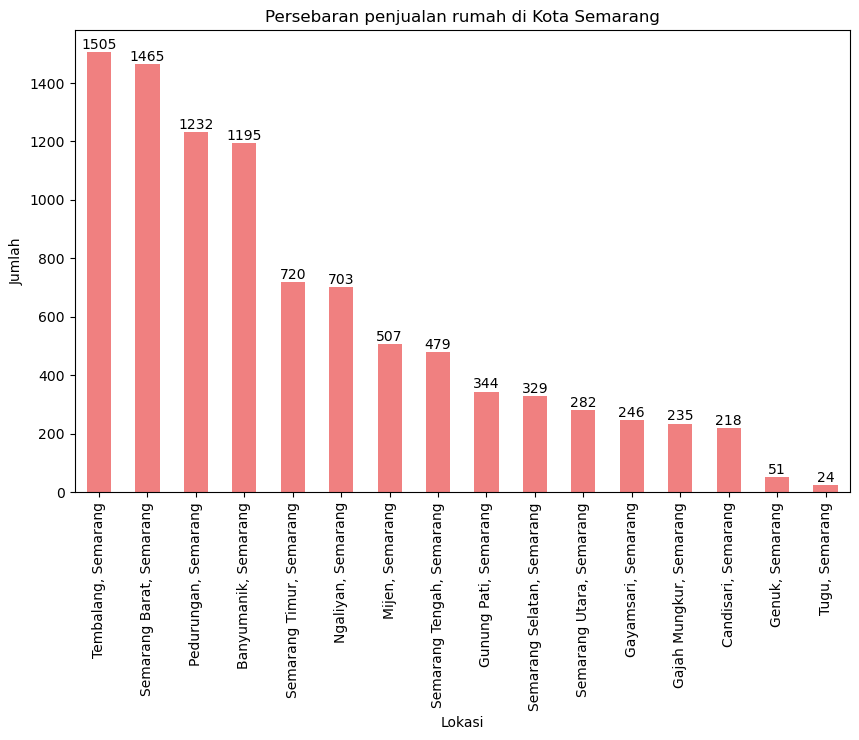

In [46]:
lok.plot(kind='bar', figsize=(10, 6), color='lightcoral')

for i, v in enumerate(lok):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Persebaran penjualan rumah di Kota Semarang')
plt.ylabel('Jumlah')
plt.xlabel('Lokasi')

plt.show()

### Apa saja jenis rumah yang terdapat pada data tersebut?

In [47]:
JR = pd.DataFrame({"Total":df_cleaning["Jenis_Rumah"].value_counts()})
JR

,Total
Rumah,9475
Rumah\nFeatured,42
Rumah\nPremier,18


In [48]:
total_JR = JR["Total"]

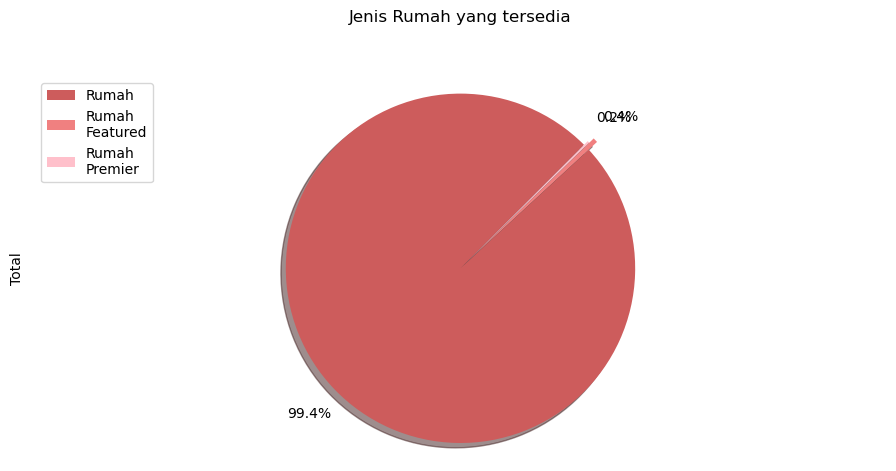

In [49]:
#pilih warna
colors_list = ['indianred','lightcoral','pink']

#pilih ukuran lingkaran
explode_list = [0.015, 0.05, 0.015]

#Tambahkan details
total_JR.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

#untuk memberikan informasi daerah berwarna
plt.legend(labels=total_JR.index,loc='upper left')
plt.axis('equal')

#menambahkan judul
plt.title('Jenis Rumah yang tersedia',y=1.12)

#menampilkan
plt.show()

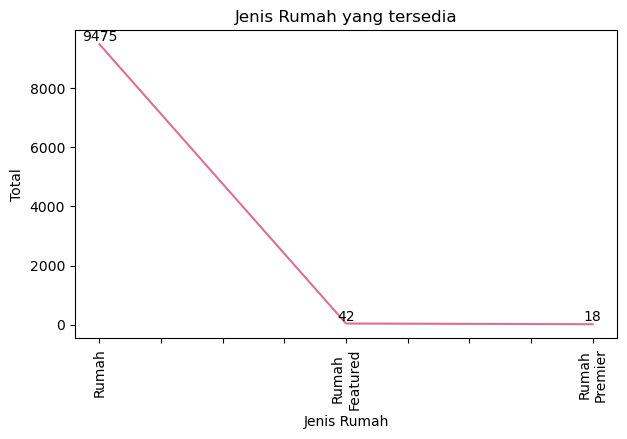

In [50]:
total_JR.plot(kind='line', figsize=(7, 4), color='palevioletred')

for i, v in enumerate(total_JR):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Jenis Rumah yang tersedia')
plt.ylabel('Total')
plt.xlabel('Jenis Rumah')

plt.xticks(rotation=90)
plt.show()

### Apakah  ada pengaruh antara lokasi dengan harga rumah?

<AxesSubplot:xlabel='Lokasi', ylabel='Harga_New'>

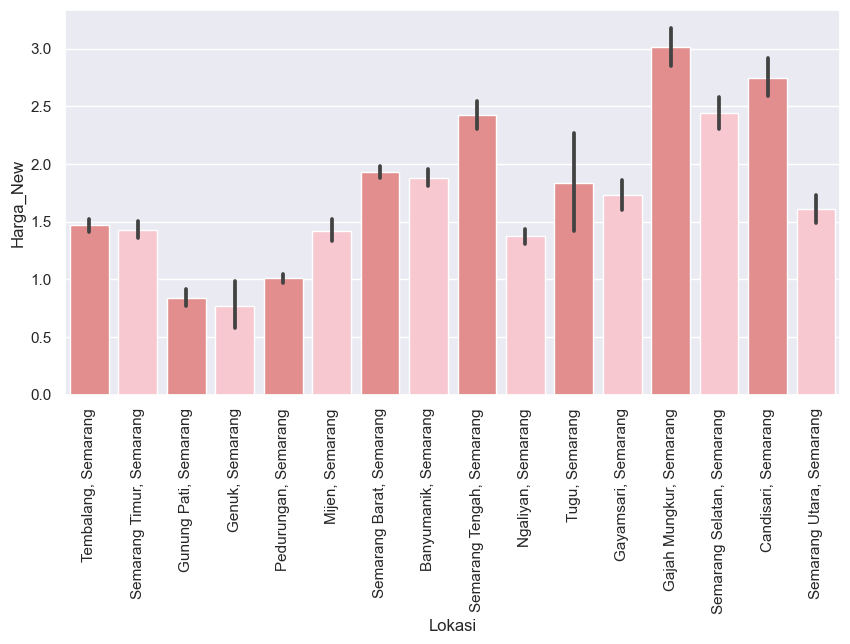

In [51]:
sns.set(rc={'figure.figsize':(10,5)})
cols = ['lightcoral','pink']
plt.xticks(rotation=90) 
sns.barplot(x='Lokasi', y='Harga_New', palette= cols, data=df_cleaning)

### Apakah ada korelasi antara luas tanah dengan harga rumah?

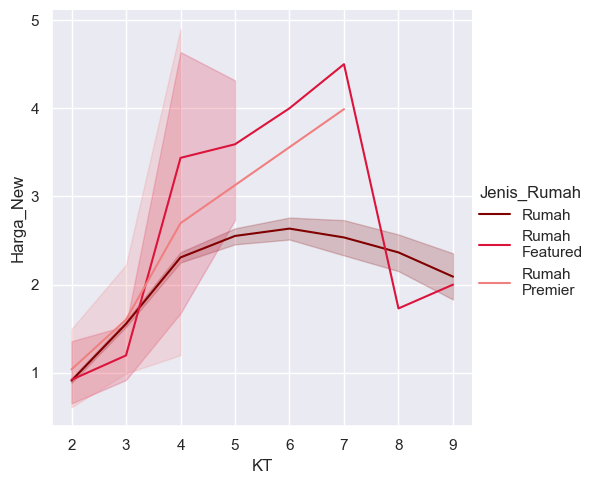

In [52]:
cols = ['maroon','crimson','lightcoral']
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='KT',
            y='Harga_New',
            hue='Jenis_Rumah',
            data=df_cleaning,
            palette = cols
           )

### Bagaimana hubungan antara KPR_Bulanan dengan harga rumah?

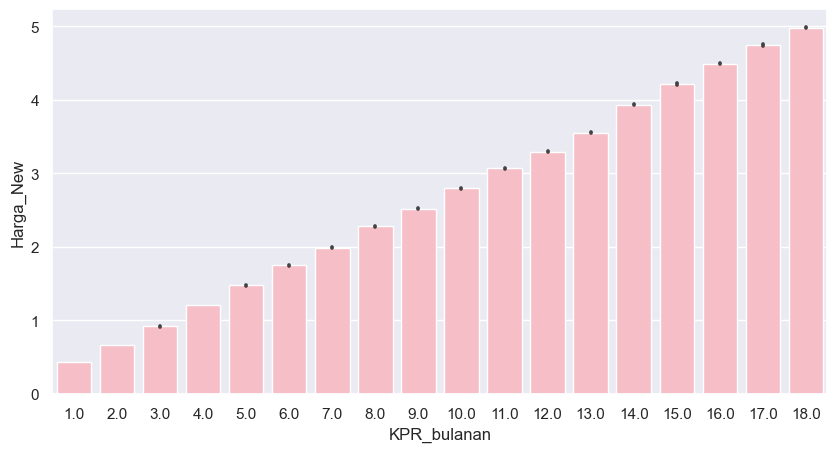

In [53]:
sns.set(rc={'figure.figsize':(10,5)})

# Define warna yang ingin digunakan
warna_garis = 'lightpink'

# Plot batang
sns.barplot(x='KPR_bulanan',
            y='Harga_New',
            data=df_cleaning,
            color=warna_garis
           )

plt.show()

### Apakah LT dan LB dapat mempengaruhi harga rumah?

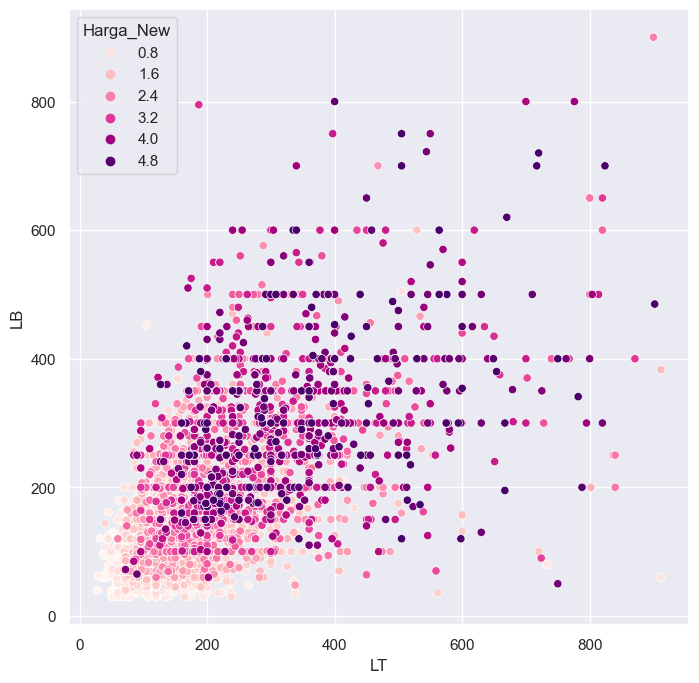

In [54]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='LT', y='LB', hue='Harga_New', palette='RdPu', data=df_cleaning)
plt.show()

## Analisis korelasi


In [55]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="PuRd", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

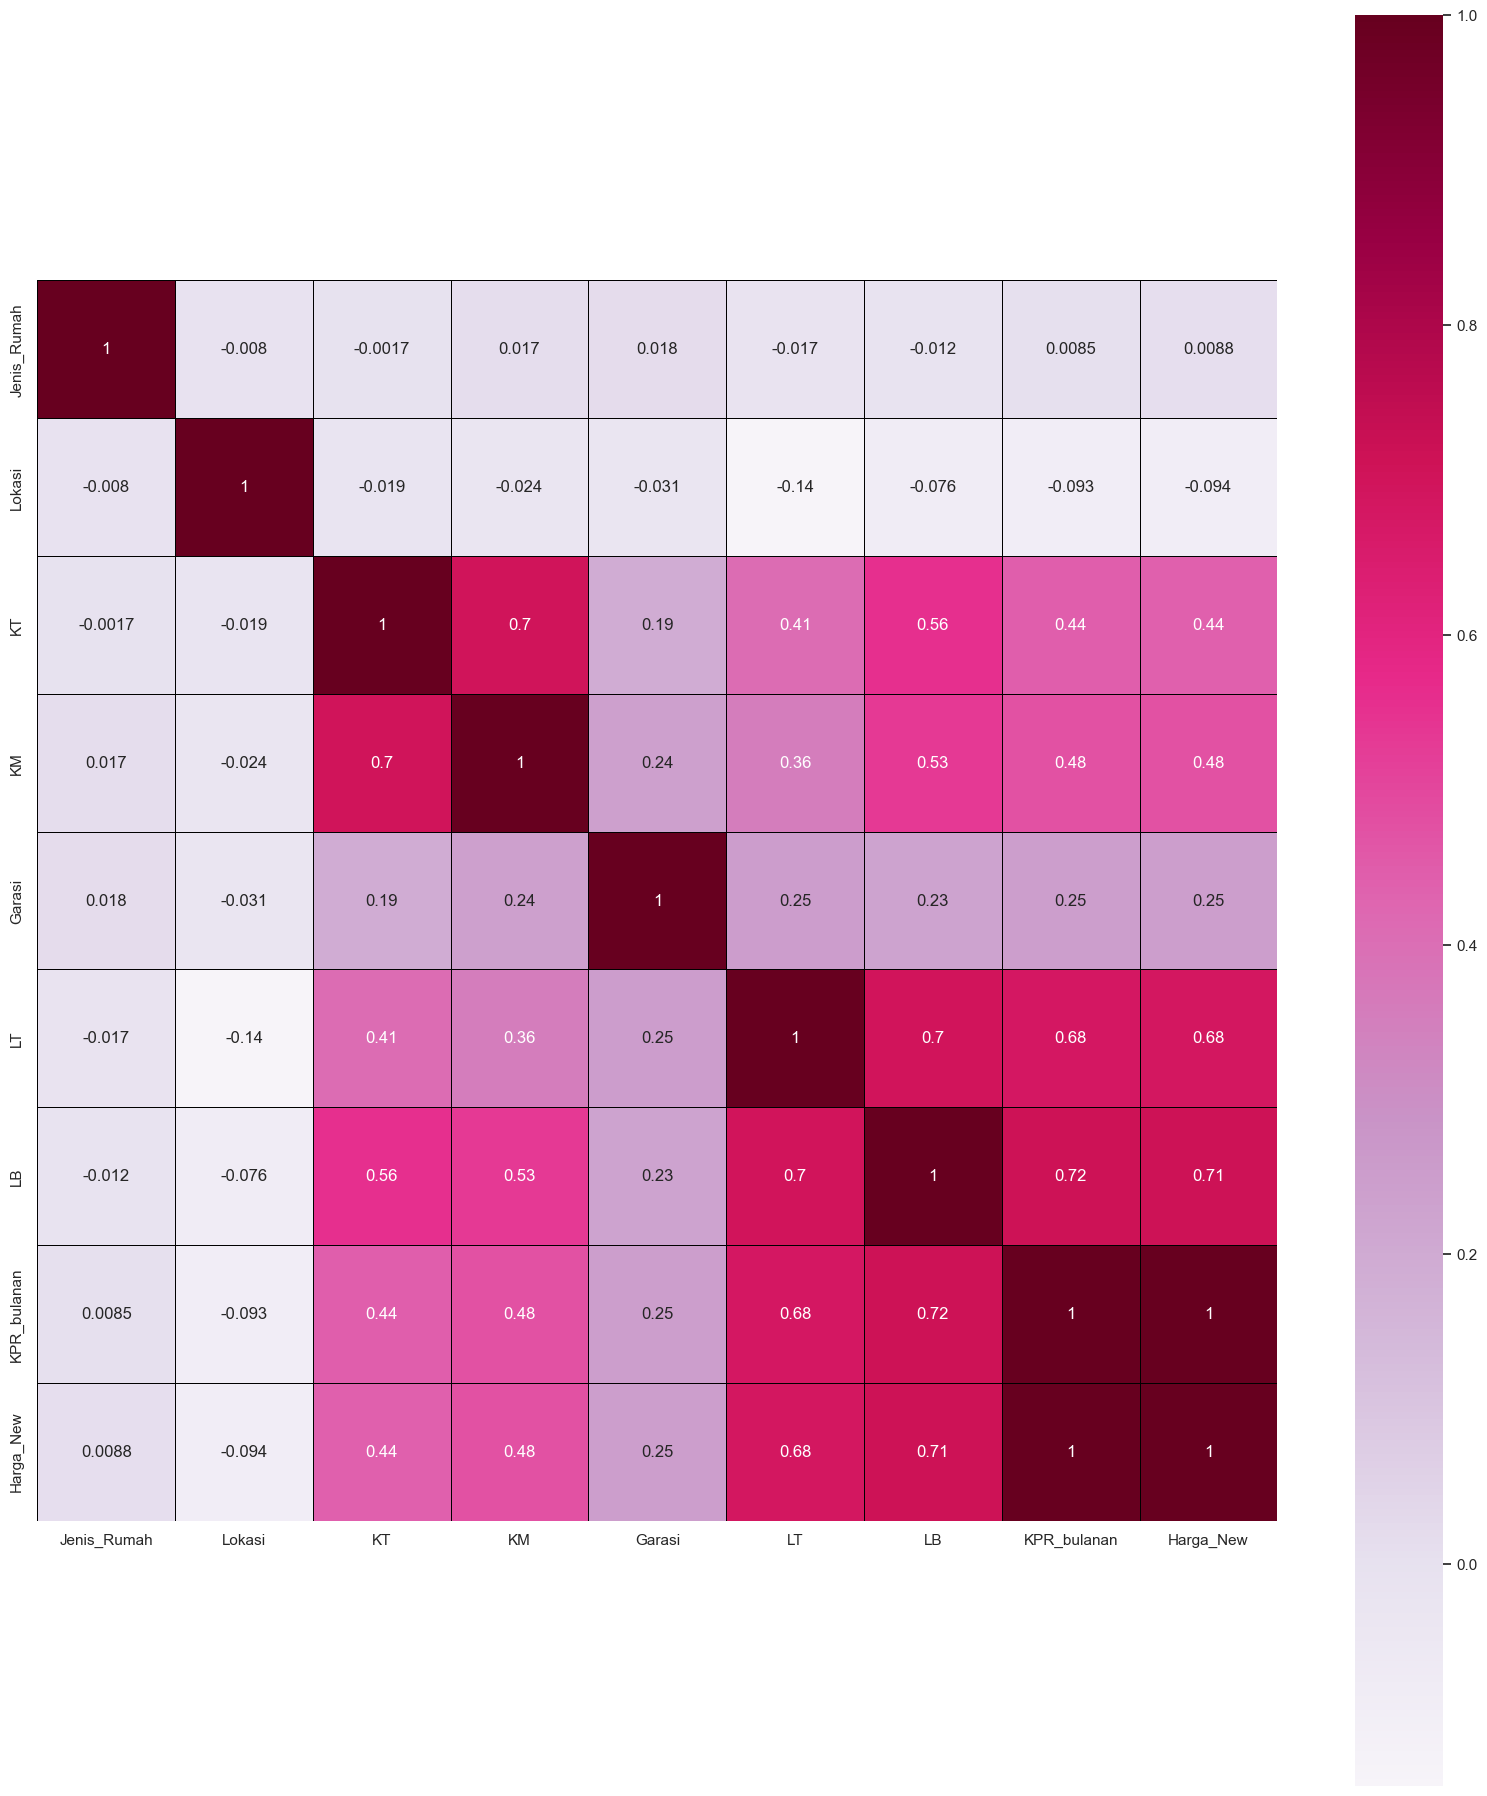

In [56]:
heat_map_modeling1 = ["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]
heat_map(df_Lencode,heat_map_modeling1)

# Analisis
## Kondisi 1
Kondisi 1 adalah dengan menggunakan data dari df_Lencode ATAU df_cleaning (nilai null diisi dengan median) & dilakukan label encode.

In [44]:
df_kondisi1 = df_Lencode
df_kondisi1.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,0,14,2,1,1,60,30,1.0,0.3
2,0,12,2,1,1,65,30,1.0,0.3
3,0,5,2,1,1,120,32,1.0,0.3
4,0,4,2,1,1,60,36,1.0,0.3
5,0,14,2,1,1,72,36,1.0,0.3


## Kondisi 2
Menggunakan data dari df_onehot ATAU df_cleaning (mengisi nilai null dengan median) & dilakukan one hot encoding.

In [45]:
df_kondisi2 = df_onehot
df_kondisi2.head()

,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New,Jenis_Rumah_Rumah,Jenis_Rumah_Rumah\nFeatured,Jenis_Rumah_Rumah\nPremier,...,"Lokasi_Mijen, Semarang","Lokasi_Ngaliyan, Semarang","Lokasi_Pedurungan, Semarang","Lokasi_Semarang Barat, Semarang","Lokasi_Semarang Selatan, Semarang","Lokasi_Semarang Tengah, Semarang","Lokasi_Semarang Timur, Semarang","Lokasi_Semarang Utara, Semarang","Lokasi_Tembalang, Semarang","Lokasi_Tugu, Semarang"
0,2,1,1,60,30,1.0,0.3,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,1,65,30,1.0,0.3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,1,1,120,32,1.0,0.3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,60,36,1.0,0.3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1,1,72,36,1.0,0.3,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Multiple Linear Regression
## Pendefinisian model
Mendefinisikan model linear regression.

In [46]:
model = LinearRegression()

## Pelatihan dan Evaluasi Model
Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Pada Linear Regression didalamnya berisi :
- R-squared, MSE, RMSE
- Nilai intercept dan slope
- Melihat harga hasil prediksi dan perbandingan dengan harga aktual
- Membuat visualisasi regresi masing-masing kondisi

### Kondisi 1

In [47]:
x = df_kondisi1.drop(columns=["Harga_New"],axis=1).values
y = df_kondisi1["Harga_New"].values

# Memisahkan data menjadi data training dan data testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
model_kondisi1 = model.fit(x_train1, y_train1)
y_pred1 = model_kondisi1.predict(x_test1)

In [49]:
mse1 = mean_squared_error(y_test1, y_pred1) 
rmse1 = np.sqrt(mse1)  
print('Nilai R-squared : ', r2_score(y_test1, y_pred1)*100) 
print('Nilai MSE : ', mse1)  
print('Nilai RMSE : ', rmse1)  

Nilai R-squared :  99.57216967934696
Nilai MSE :  0.005900192587723508
Nilai RMSE :  0.07681271110775552


In [50]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
MAE = mean_absolute_error(y_test1,y_pred1)
MAPE = mean_absolute_percentage_error(y_test1,y_pred1)
print('Nilai MAE : ', MAE)  
print('Nilai MAPE : ', MAPE) 

Nilai MAE :  0.0668430375065306
Nilai MAPE :  0.0654826708726933


In [51]:
coef1 = model_kondisi1.coef_
intercept = model_kondisi1.intercept_
print("Nilai intercept :", model_kondisi1.intercept_)
print("Nilai slope :", model_kondisi1.coef_)

Nilai intercept : 0.13502201462630836
Nilai slope : [ 4.28181448e-03 -1.11365499e-04 -1.05072102e-03  1.44367766e-03
 -7.92041778e-04  5.19100874e-05 -1.38306201e-05  2.67135592e-01]


In [52]:
y_pred1

array([0.67199573, 2.27984101, 2.27521715, ..., 4.96705421, 2.28149552,
       0.67515655])

In [53]:
kondisi1 = pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred1})
kondisi1.head()

,Actual,Predicted
0,0.75,0.671996
1,2.35,2.279841
2,2.20,2.275217
3,1.50,1.473553
4,0.55,0.670789


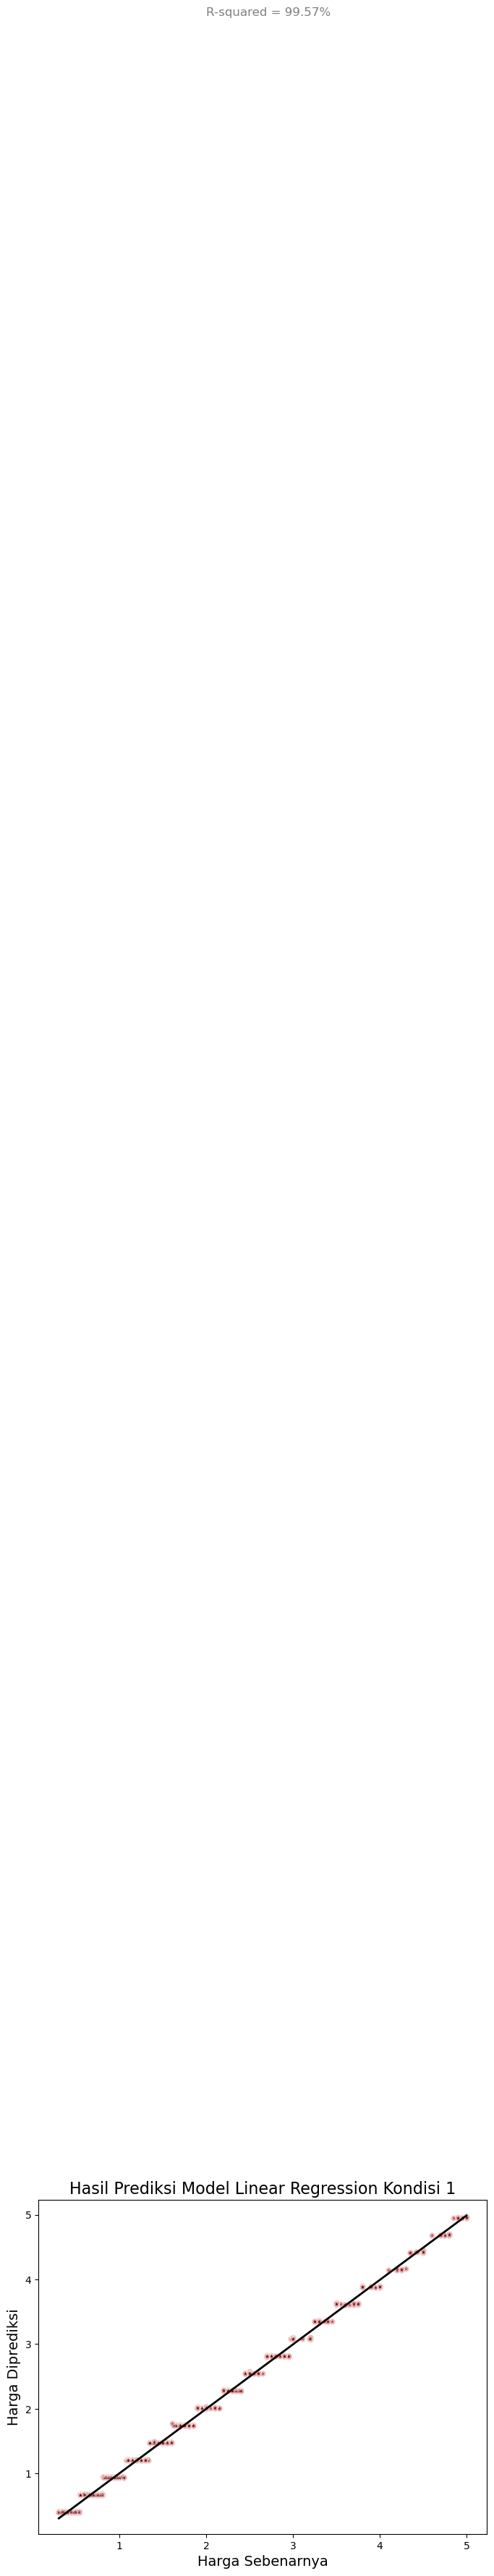

In [54]:
condition1 = (y_test1 < 50) # kondisi untuk subset pertama
subset1_x1 = y_test1
subset1_y1 = y_pred1

subset2_x1 = y_test1
subset2_y1 = y_pred1

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x1, y=subset1_y1, color='lightcoral', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x1, y=subset2_y1, color='maroon', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test1, y=y_pred1, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Kondisi 1', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 39, f'R-squared = {round(r2_score(y_test1, y_pred1)*100, 2)}%', fontsize=12, color='grey')

plt.show()

### Kondisi 2

In [55]:
x = df_kondisi2.drop(columns=["Harga_New"],axis=1).values
y = df_kondisi2["Harga_New"].values

# Memisahkan data menjadi data training dan data testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=0)

In [56]:
model_kondisi2 = model.fit(x_train2, y_train2)
y_pred2 = model_kondisi2.predict(x_test2)

In [57]:
mse2 = mean_squared_error(y_test2, y_pred2)  
rmse2 = np.sqrt(mse2)  
print("Nilai R-squared :", r2_score(y_test2, y_pred2)*100)
print("Nilai MSE :", mse2)  
print("Nilai RMSE :", rmse2)  

Nilai R-squared : 99.57415691652555
Nilai MSE : 0.005900464006793959
Nilai RMSE : 0.07681447784626254


In [58]:
coef2 = model_kondisi2.coef_
intercept = model_kondisi2.intercept_
print("Nilai intercept :", model_kondisi2.intercept_)
print("Nilai slope :", model_kondisi2.coef_)

Nilai intercept : 0.1385688843299009
Nilai slope : [-1.83673229e-03  7.48150367e-04 -1.32737922e-03  7.44601815e-05
 -1.09572424e-05  2.66709951e-01 -2.36483590e-03  1.29656044e-03
  1.06827546e-03  2.58708609e-04  1.98779183e-03  1.04131625e-02
 -4.84128318e-03 -2.82231322e-02 -8.58231937e-03 -8.29180721e-04
 -7.82664313e-04  1.13808416e-03 -3.72429261e-03  9.65282899e-04
  7.61661889e-03 -3.35431932e-03  2.28775286e-03  1.62909957e-03
  2.40406904e-02]


In [59]:
y_pred2

array([0.67281986, 0.67851487, 1.47105502, ..., 0.66476109, 1.20427497,
       0.93571927])

In [60]:
kondisi2 = pd.DataFrame({'Actual':y_test2, 'Predicted':y_pred2})
kondisi2.head()

,Actual,Predicted
0,0.645,0.672820
1,0.640,0.678515
2,1.500,1.471055
3,0.800,0.671821
4,1.990,2.006487


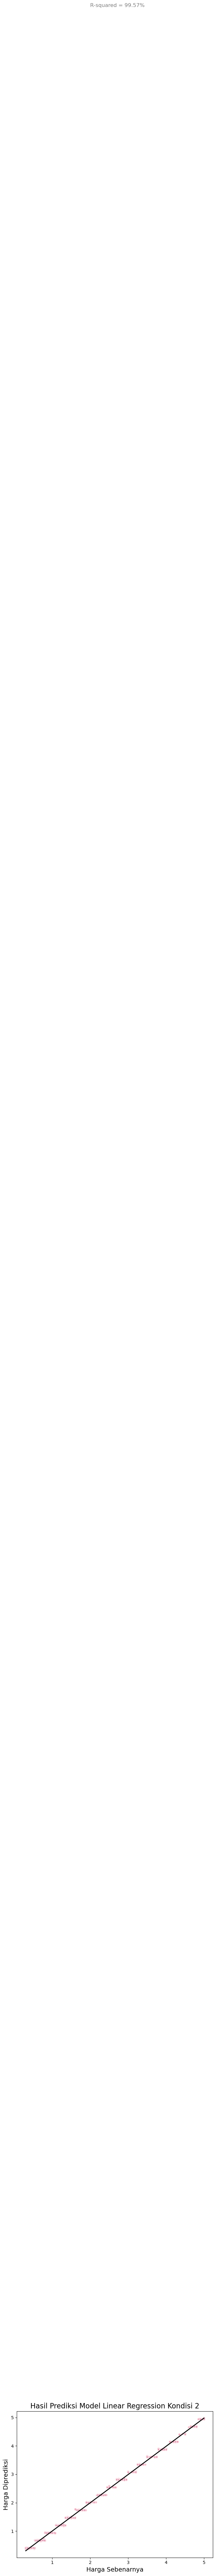

In [61]:
condition2 = (y_test2 < 50) # kondisi untuk subset pertama
subset1_x2 = y_test2
subset1_y2 = y_pred2

subset2_x2 = y_test2
subset2_y2 = y_pred2

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x2, y=subset1_y2, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x2, y=subset2_y2, color='palevioletred', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test2, y=y_pred2, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Kondisi 2', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 90, f'R-squared = {round(r2_score(y_test2, y_pred2)*100, 2)}%', fontsize=12, color='grey')

plt.show()

# Random Forest Regression
## Pendefinisian Model

In [62]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=5, random_state = 42,n_estimators=200)

## Pelatihan dan Evaluasi Model
### Kondisi 1

In [89]:
X = df_kondisi1[["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan"]]
y = df_kondisi1["Harga_New"]

# Memisahkan data menjadi data training dan data testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
model_RF1 = RF.fit(X_train1, y_train1)
y_pred1 = model_RF1.predict(X_test1)

In [91]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)

# evaluating the model
print("Mean Squared Error : {}".format(mse))
print("Root Mean Squared Error : {}".format(rmse))
print("Training Score :", RF.score(X_train1, y_train1))
print("R squared :",r2_score(y_test1, y_pred1)*100)

Mean Squared Error : 0.005262281360550385
Root Mean Squared Error : 0.07254158366447748
Training Score : 0.9965753472460847
R squared : 99.61842541775073


In [92]:
from sklearn.model_selection import cross_validate
scores = cross_validate(RF, X_test1, y_test1,  cv=5)
scores

{'fit_time': array([0.80413866, 0.71725631, 0.67218208, 0.6779325 , 0.68709636]),
 'score_time': array([0.03000021, 0.02450752, 0.02051449, 0.01951003, 0.02451038]),
 'test_score': array([0.99635342, 0.99579121, 0.99603846, 0.99599198, 0.99625482])}

In [93]:
y_pred1

array([0.65771832, 2.29063808, 2.27530388, ..., 4.97608914, 2.2826378 ,
       0.67677317])

In [94]:
y_test1

3554     0.750
9761     2.350
9519     2.200
7417     1.500
1822     0.550
         ...  
5278     0.976
1151     0.487
12636    5.000
9802     2.400
2223     0.590
Name: Harga_New, Length: 1907, dtype: float64

In [95]:
# Mengubah numpy array menjadi pandas Series
y_predict1 = pd.Series(y_pred1)

print(y_predict1)

0       0.657718
1       2.290638
2       2.275304
3       1.468078
4       0.657718
          ...   
1902    0.897621
1903    0.448235
1904    4.976089
1905    2.282638
1906    0.676773
Length: 1907, dtype: float64


In [96]:
kondisi1_RF = pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred1})
kondisi1_RF.head()

,Actual,Predicted
3554,0.75,0.657718
9761,2.35,2.290638
9519,2.20,2.275304
7417,1.50,1.468078
1822,0.55,0.657718


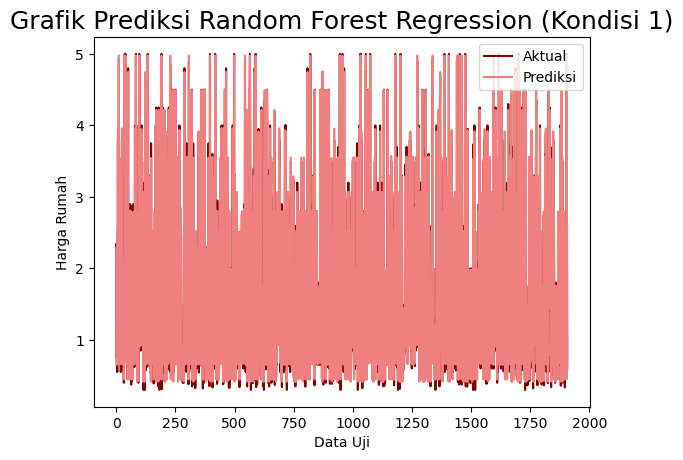

In [97]:
plt.plot(y_test1.values, color='maroon', label='Aktual')
plt.plot(y_predict1.values, color='lightcoral', label='Prediksi')
plt.xlabel('Data Uji')
plt.ylabel('Harga Rumah')
plt.title('Grafik Prediksi Random Forest Regression (Kondisi 1)', fontsize=18)
plt.legend()
plt.show()

### Kondisi 2

In [77]:
X2 = df_kondisi2.drop(columns=["Harga_New"],axis=1)
y2 = df_kondisi2["Harga_New"]

# Memisahkan data menjadi data training dan data testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [78]:
model_RF2 = RF.fit(X_train2, y_train2)
y_pred2 = model_RF2.predict(X_test2)

In [79]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)

# evaluating the model
print("Mean Squared Error : {}".format(mse))
print("Root Mean Squared Error : {}".format(rmse))
print("Training Score :", RF.score(X_train2, y_train2))
print("R squared :",r2_score(y_test2, y_pred2)*100)

Mean Squared Error : 0.005266444059472485
Root Mean Squared Error : 0.07257026980432472
Training Score : 0.9965776136630952
R squared : 99.618123575262


In [80]:
from sklearn.model_selection import cross_validate
scores = cross_validate(RF, X_test2, y_test2,  cv=5)
scores

{'fit_time': array([1.03388786, 0.9161489 , 0.94967198, 0.90929556, 0.84371877]),
 'score_time': array([0.03400588, 0.02999949, 0.02602291, 0.02600336, 0.02251482]),
 'test_score': array([0.99635696, 0.9957731 , 0.99606177, 0.99598861, 0.99625615])}

In [81]:
y_pred2

array([0.65771832, 2.29062365, 2.27490259, ..., 4.97608914, 2.28882542,
       0.67677317])

In [82]:
y_test1

3554     0.750
9761     2.350
9519     2.200
7417     1.500
1822     0.550
         ...  
5278     0.976
1151     0.487
12636    5.000
9802     2.400
2223     0.590
Name: Harga_New, Length: 1907, dtype: float64

In [83]:
# Mengubah numpy array menjadi pandas Series
y_predict2 = pd.Series(y_pred2)

print(y_predict2)

0       0.657718
1       2.290624
2       2.274903
3       1.468078
4       0.657718
          ...   
1902    0.899347
1903    0.448186
1904    4.976089
1905    2.288825
1906    0.676773
Length: 1907, dtype: float64


In [84]:
kondisi2_RF = pd.DataFrame({'Actual':y_test2, 'Predicted':y_pred2})
kondisi2_RF.head()

,Actual,Predicted
3554,0.75,0.657718
9761,2.35,2.290624
9519,2.20,2.274903
7417,1.50,1.468078
1822,0.55,0.657718


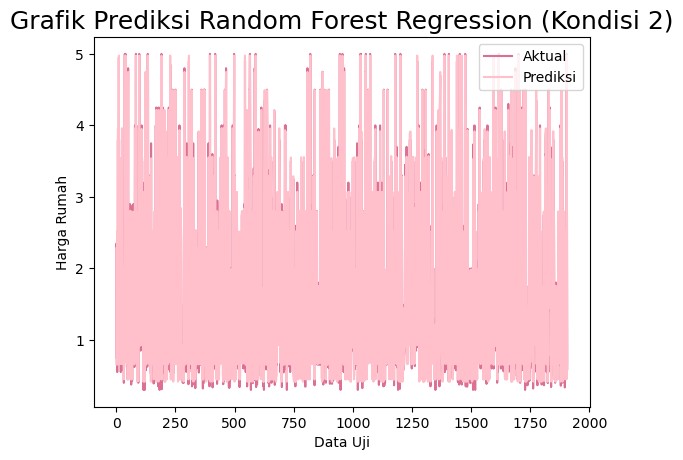

In [85]:
plt.plot(y_test2.values, color= 'palevioletred', label='Aktual')
plt.plot(y_predict2.values, color= 'pink', label='Prediksi')
plt.xlabel('Data Uji')
plt.ylabel('Harga Rumah')
plt.title('Grafik Prediksi Random Forest Regression (Kondisi 2)', fontsize=18)
plt.legend()
plt.show()

# Variable Importance
## Kondisi 1

In [73]:
# Extract feature importances
importance = RF.feature_importances_

# Hitung korelasi antara variabel independen dan dependen
correlations = np.corrcoef(X.T, y)

# Tampilkan korelasi antara variabel independen dan dependen
for i, variable in enumerate(X.columns):
    print(f"Korelasi antara {variable} dan Harga Rumah: {correlations[i][-1]}")

Korelasi antara Jenis_Rumah dan Harga Rumah: 0.008772443440748123
Korelasi antara Lokasi dan Harga Rumah: -0.0935033623967509
Korelasi antara KT dan Harga Rumah: 0.4413284459431216
Korelasi antara KM dan Harga Rumah: 0.4756842640460637
Korelasi antara Garasi dan Harga Rumah: 0.24564418312718608
Korelasi antara LT dan Harga Rumah: 0.6836212683761378
Korelasi antara LB dan Harga Rumah: 0.7142708857297403
Korelasi antara KPR_bulanan dan Harga Rumah: 0.9979225834383358


## Kondisi 2

In [86]:
# Extract feature importances
importance = RF.feature_importances_

# Hitung korelasi antara variabel independen dan dependen
correlations = np.corrcoef(X2.T, y)

# Tampilkan korelasi antara variabel independen dan dependen
for i, variable in enumerate(X2.columns):
    print(f"Korelasi antara {variable} dan Harga Rumah: {correlations[i][-1]}")

Korelasi antara KT dan Harga Rumah: 0.44132844594312165
Korelasi antara KM dan Harga Rumah: 0.47568426404606395
Korelasi antara Garasi dan Harga Rumah: 0.24564418312718678
Korelasi antara LT dan Harga Rumah: 0.6836212683761386
Korelasi antara LB dan Harga Rumah: 0.7142708857297404
Korelasi antara KPR_bulanan dan Harga Rumah: 0.9979225834383337
Korelasi antara Jenis_Rumah_Rumah dan Harga Rumah: -0.010553285717820915
Korelasi antara Jenis_Rumah_Rumah
Featured dan Harga Rumah: 0.010759227164421634
Korelasi antara Jenis_Rumah_Rumah
Premier dan Harga Rumah: 0.0028107580851948724
Korelasi antara Lokasi_Banyumanik, Semarang dan Harga Rumah: 0.07222217941797945
Korelasi antara Lokasi_Candisari, Semarang dan Harga Rumah: 0.14111625292324267
Korelasi antara Lokasi_Gajah Mungkur, Semarang dan Harga Rumah: 0.1835477832362827
Korelasi antara Lokasi_Gayamsari, Semarang dan Harga Rumah: 0.010632873453779642
Korelasi antara Lokasi_Genuk, Semarang dan Harga Rumah: -0.05501305644399133
Korelasi antara L

# Model Inference
Dipilih model dengan algoritma random forest regression dengan kondisi 1 sebagai model yang akan dilakukan deployment.

In [98]:
# Memasukkan data dengan Jenis_Rumah = 0, Lokasi = 14, KT=3, KM=5, Garasi=1, LT=120, LB=100, KPR_bulanan= 8
input_data = [[0, 14, 3, 5, 1, 120, 100, 8]]  # Data dalam bentuk list

# Konversi list ke array numpy
input_data_array = np.array(input_data)

# Lakukan prediksi menggunakan model RandomForestRegressor
prediction = model_RF1.predict(input_data_array)

# Cetak hasil prediksi
print("Prediksi harga:", prediction)

Prediksi harga: [2.29431562]


In [99]:
model_inference = {'Jenis_Rumah':[1,0,2,0,1],
                   'Lokasi':[0,2,10,14,12],
                   'KT':[1,4,2,3,1],
                   'KM':[2,1,4,1,3],
                   'Garasi':[1,2,1,1,2],
                   'LT':[100,95,120,150,87],
                   'LB':[90,84,100,120,76],
                   'KPR_bulanan':[3,1,4,5,2]
                  }
model_inference = pd.DataFrame(model_inference)
model_inference

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan
0,1,0,1,2,1,100,90,3
1,0,2,4,1,2,95,84,1
2,2,10,2,4,1,120,100,4
3,0,14,3,1,1,150,120,5
4,1,12,1,3,2,87,76,2


In [100]:
prediksi = model_RF1.predict(model_inference)
prediksi

array([0.90588   , 0.44759657, 1.20616258, 1.47983987, 0.66536148])

# Deployment


In [101]:
import pickle

filename = 'prediksi_harga_rumah_smg.sav'
pickle.dump(model_RF1, open(filename,'wb'))